# The Lennard-Jones Potential

## Introduction

The Lennard-Jones potential is one of the most widely used mathematical models in computational physics and chemistry for describing the interaction between a pair of neutral atoms or molecules. It captures two essential features of interatomic interactions:

1. **Short-range repulsion** due to overlapping electron orbitals (Pauli repulsion)
2. **Long-range attraction** due to van der Waals forces (induced dipole-dipole interactions)

## Mathematical Formulation

The Lennard-Jones potential is given by:

$$V(r) = 4\varepsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]$$

where:
- $r$ is the distance between two particles
- $\varepsilon$ is the depth of the potential well (characterizing the strength of interaction)
- $\sigma$ is the finite distance at which the inter-particle potential is zero

### Alternative Form

The potential can also be written in terms of the equilibrium distance $r_m$:

$$V(r) = \varepsilon \left[ \left( \frac{r_m}{r} \right)^{12} - 2\left( \frac{r_m}{r} \right)^{6} \right]$$

where $r_m = 2^{1/6}\sigma \approx 1.122\sigma$ is the distance at which the potential reaches its minimum.

## Physical Interpretation

### The Repulsive Term ($r^{-12}$)

The $r^{-12}$ term dominates at short distances and represents the strong repulsion between atoms when their electron clouds overlap. The exponent 12 is chosen for computational convenience (as the square of 6) rather than having a rigorous theoretical basis.

### The Attractive Term ($r^{-6}$)

The $r^{-6}$ term represents the attractive van der Waals interaction (London dispersion forces). This form has a theoretical foundation in quantum mechanical perturbation theory for induced dipole-dipole interactions.

## Force Derivation

The force between two particles is obtained from the negative gradient of the potential:

$$F(r) = -\frac{dV}{dr} = \frac{24\varepsilon}{r} \left[ 2\left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]$$

The force is:
- **Repulsive** ($F > 0$) when $r < r_m$
- **Zero** when $r = r_m$ (equilibrium)
- **Attractive** ($F < 0$) when $r > r_m$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set up publication-quality plot parameters
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'legend.fontsize': 11,
    'figure.figsize': (10, 8)
})

## Implementation

We now implement the Lennard-Jones potential and force functions, using reduced units where $\varepsilon = 1$ and $\sigma = 1$.

In [2]:
def lennard_jones_potential(r, epsilon=1.0, sigma=1.0):
    """
    Calculate the Lennard-Jones potential.
    
    Parameters:
    -----------
    r : array_like
        Distance between particles
    epsilon : float
        Depth of the potential well
    sigma : float
        Distance at which potential is zero
    
    Returns:
    --------
    V : array_like
        Potential energy
    """
    ratio = sigma / r
    return 4 * epsilon * (ratio**12 - ratio**6)


def lennard_jones_force(r, epsilon=1.0, sigma=1.0):
    """
    Calculate the Lennard-Jones force.
    
    Parameters:
    -----------
    r : array_like
        Distance between particles
    epsilon : float
        Depth of the potential well
    sigma : float
        Distance at which potential is zero
    
    Returns:
    --------
    F : array_like
        Force (positive = repulsive, negative = attractive)
    """
    ratio = sigma / r
    return 24 * epsilon / r * (2 * ratio**12 - ratio**6)

## Visualization

Let us visualize the Lennard-Jones potential and force as functions of the interparticle distance.

In [3]:
# Define distance range (avoiding r=0 singularity)
r = np.linspace(0.9, 3.0, 500)

# Calculate potential and force
V = lennard_jones_potential(r)
F = lennard_jones_force(r)

# Calculate key points
r_min = 2**(1/6)  # Equilibrium distance
V_min = lennard_jones_potential(r_min)  # Minimum potential (-epsilon)

print(f"Equilibrium distance r_m = 2^(1/6) σ ≈ {r_min:.4f} σ")
print(f"Minimum potential V(r_m) = {V_min:.4f} ε")

Equilibrium distance r_m = 2^(1/6) σ ≈ 1.1225 σ
Minimum potential V(r_m) = -1.0000 ε


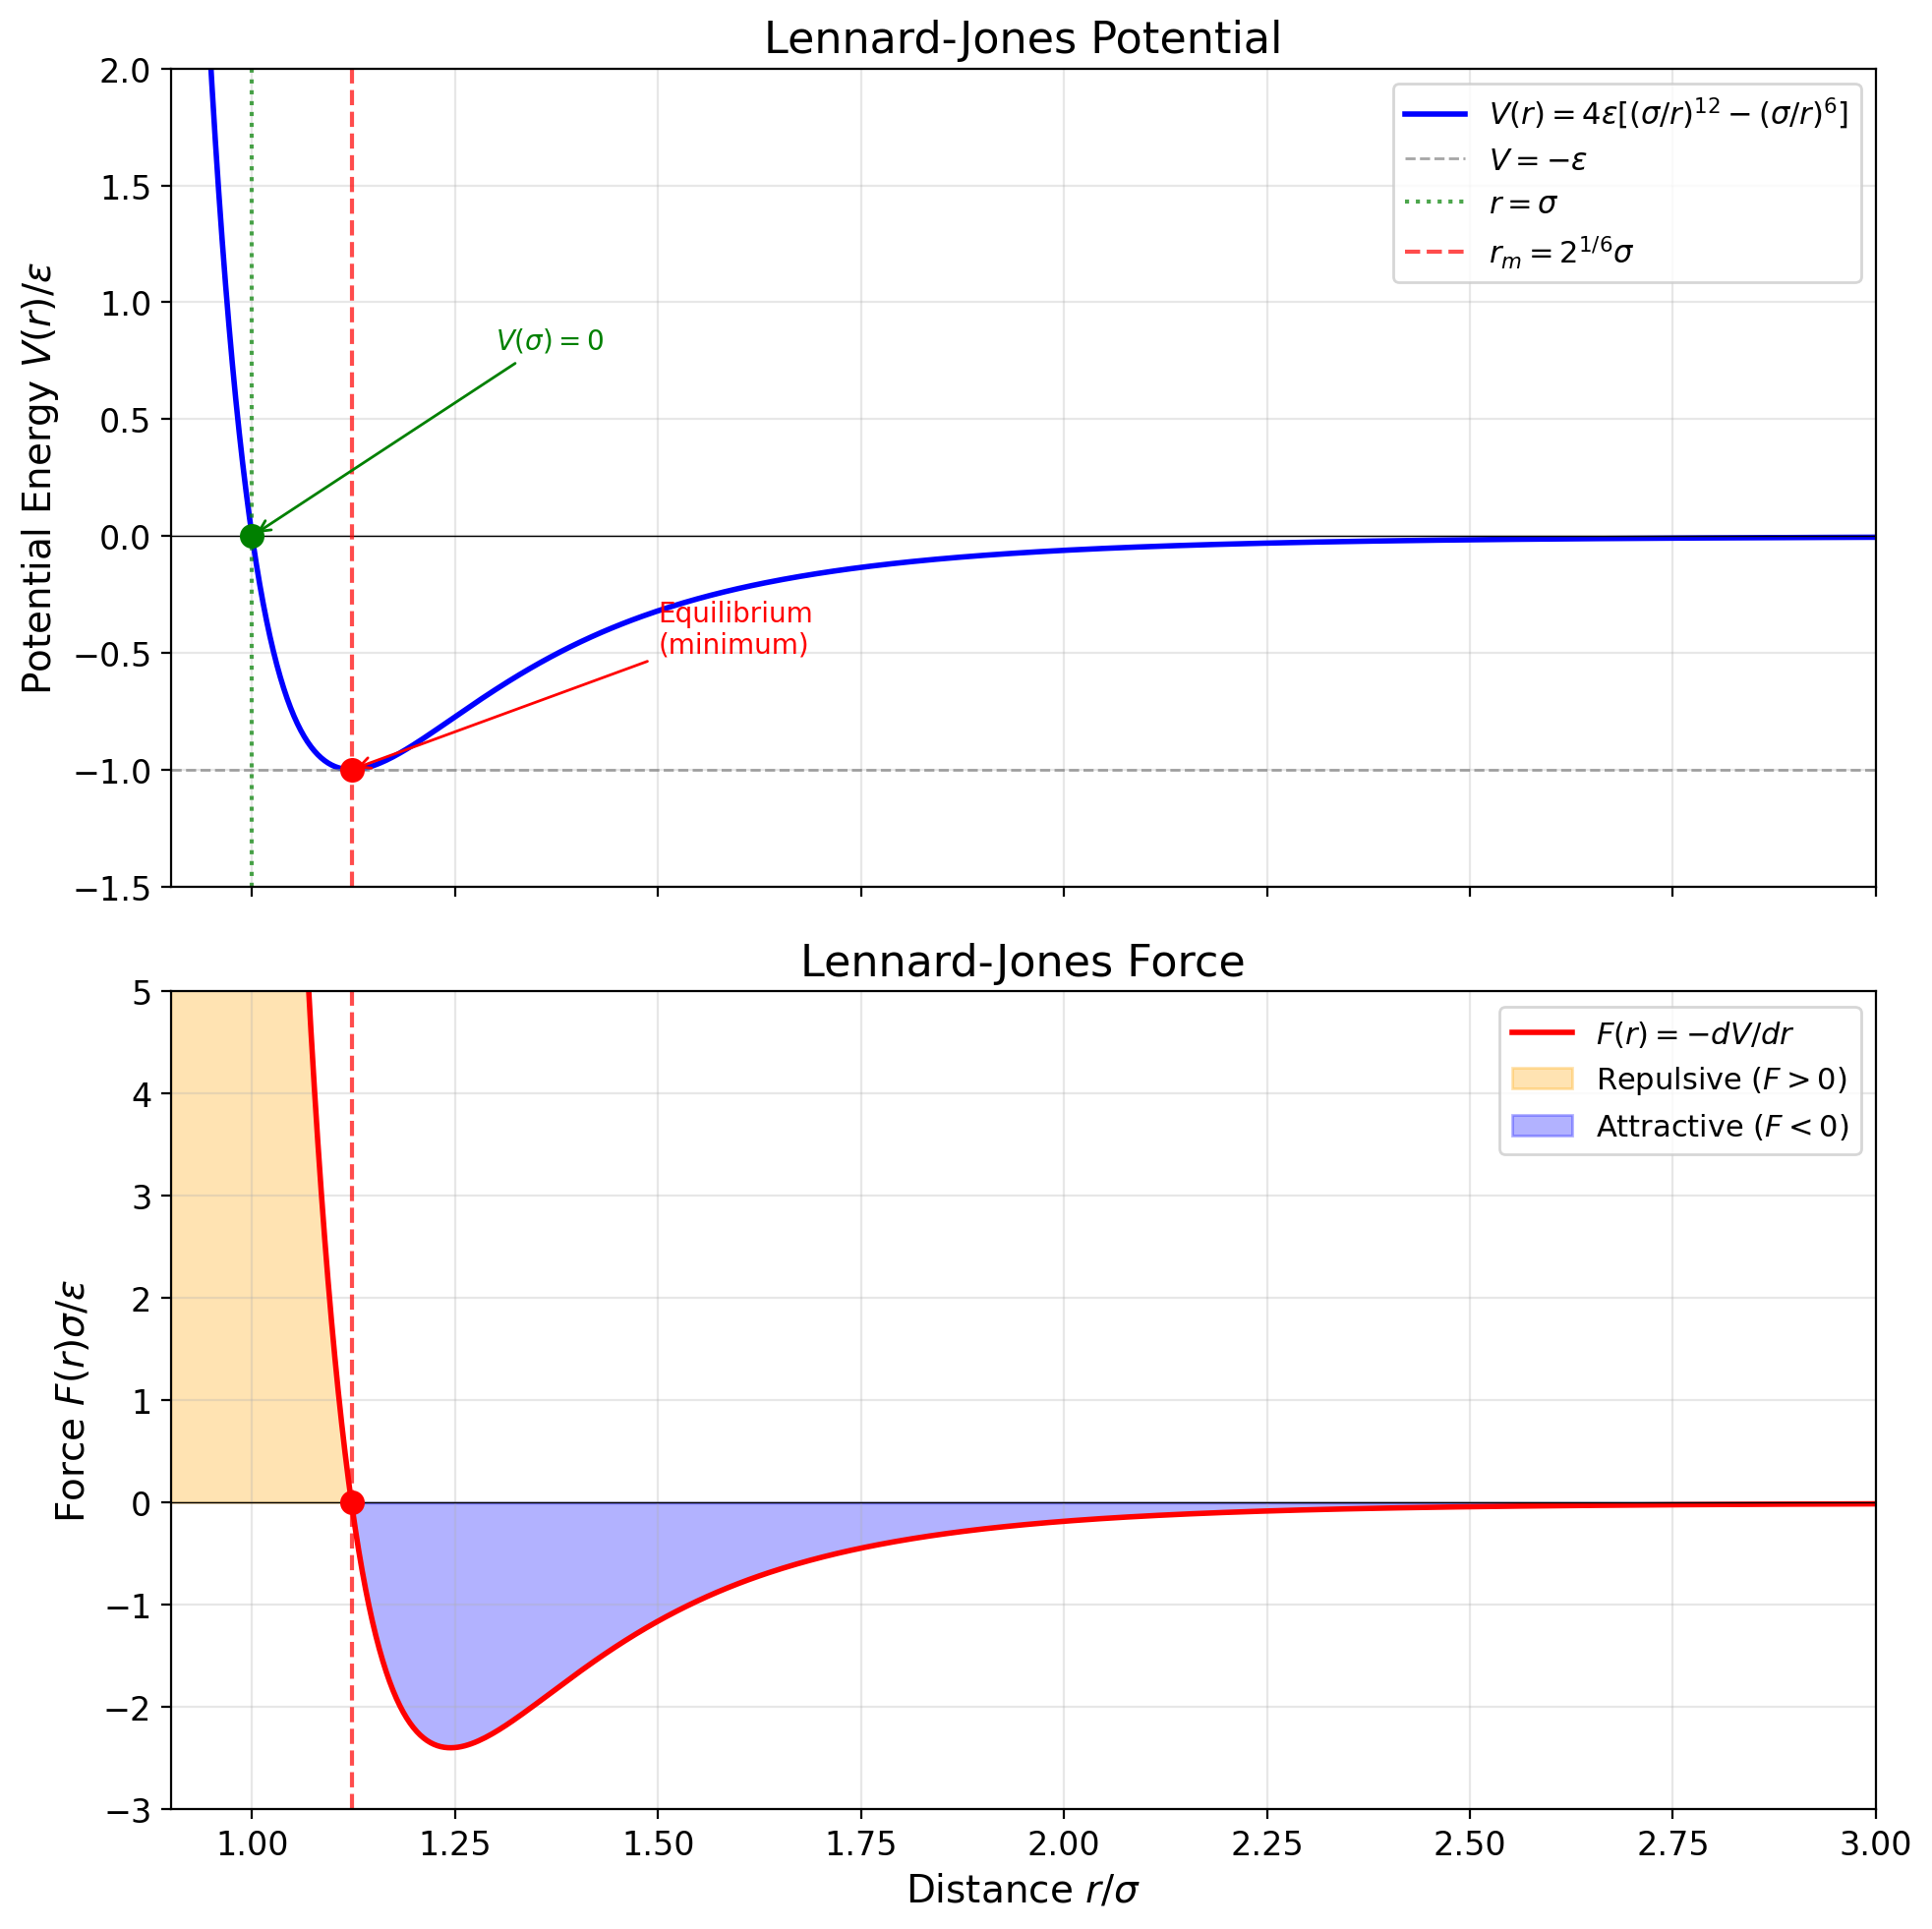


Plot saved to 'plot.png'


In [4]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot potential energy
ax1.plot(r, V, 'b-', linewidth=2, label='$V(r) = 4\\varepsilon[(\\sigma/r)^{12} - (\\sigma/r)^{6}]$')
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax1.axhline(y=-1, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='$V = -\\varepsilon$')
ax1.axvline(x=1, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label='$r = \\sigma$')
ax1.axvline(x=r_min, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'$r_m = 2^{{1/6}}\\sigma$')
ax1.plot(r_min, V_min, 'ro', markersize=8)
ax1.plot(1, 0, 'go', markersize=8)

ax1.set_ylabel('Potential Energy $V(r)/\\varepsilon$')
ax1.set_ylim(-1.5, 2)
ax1.set_xlim(0.9, 3.0)
ax1.legend(loc='upper right')
ax1.set_title('Lennard-Jones Potential', fontsize=16)
ax1.grid(True, alpha=0.3)

# Annotate key features
ax1.annotate('Equilibrium\n(minimum)', xy=(r_min, V_min), xytext=(1.5, -0.5),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')
ax1.annotate('$V(\\sigma) = 0$', xy=(1, 0), xytext=(1.3, 0.8),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green')

# Plot force
ax2.plot(r, F, 'r-', linewidth=2, label='$F(r) = -dV/dr$')
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax2.axvline(x=r_min, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.plot(r_min, 0, 'ro', markersize=8)

# Shade regions
ax2.fill_between(r, F, 0, where=(F > 0), alpha=0.3, color='orange', label='Repulsive ($F > 0$)')
ax2.fill_between(r, F, 0, where=(F < 0), alpha=0.3, color='blue', label='Attractive ($F < 0$)')

ax2.set_xlabel('Distance $r/\\sigma$')
ax2.set_ylabel('Force $F(r)\\sigma/\\varepsilon$')
ax2.set_ylim(-3, 5)
ax2.legend(loc='upper right')
ax2.set_title('Lennard-Jones Force', fontsize=16)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lennard_jones_potential_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis of Components

Let us examine the individual contributions of the repulsive and attractive terms to understand how they combine to form the Lennard-Jones potential.

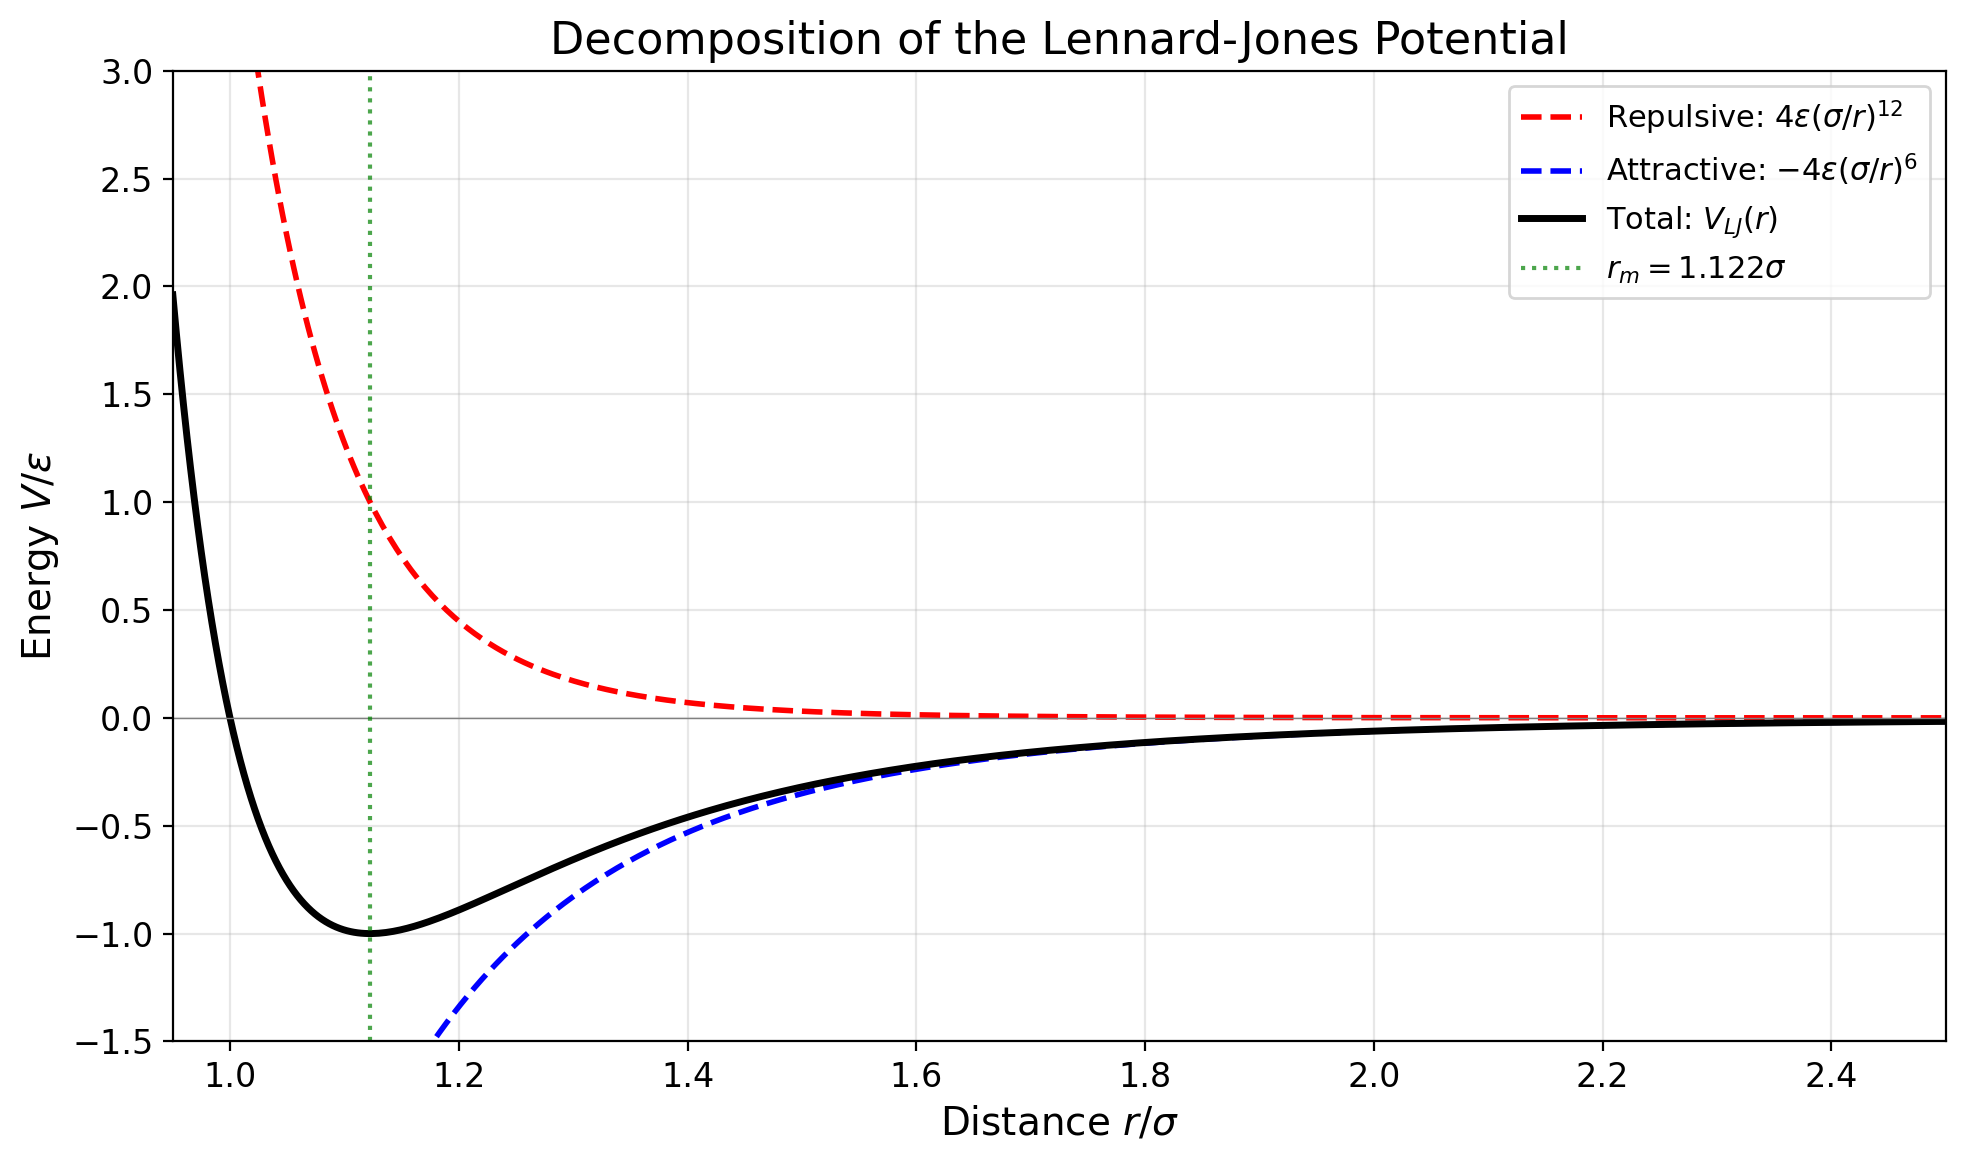

In [5]:
# Decompose into repulsive and attractive components
r_decomp = np.linspace(0.95, 2.5, 500)
sigma = 1.0
epsilon = 1.0

V_repulsive = 4 * epsilon * (sigma/r_decomp)**12
V_attractive = -4 * epsilon * (sigma/r_decomp)**6
V_total = V_repulsive + V_attractive

# Plot decomposition
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(r_decomp, V_repulsive, 'r--', linewidth=2, label='Repulsive: $4\\varepsilon(\\sigma/r)^{12}$')
ax.plot(r_decomp, V_attractive, 'b--', linewidth=2, label='Attractive: $-4\\varepsilon(\\sigma/r)^{6}$')
ax.plot(r_decomp, V_total, 'k-', linewidth=2.5, label='Total: $V_{LJ}(r)$')

ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
ax.axvline(x=r_min, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label=f'$r_m = {r_min:.3f}\\sigma$')

ax.set_xlabel('Distance $r/\\sigma$', fontsize=14)
ax.set_ylabel('Energy $V/\\varepsilon$', fontsize=14)
ax.set_title('Decomposition of the Lennard-Jones Potential', fontsize=16)
ax.set_xlim(0.95, 2.5)
ax.set_ylim(-1.5, 3)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Typical Parameters for Noble Gases

The Lennard-Jones potential is commonly used to model noble gas interactions. Here are typical parameters:

| Element | $\varepsilon/k_B$ (K) | $\sigma$ (Å) |
|---------|----------------------|-------------|
| He      | 10.2                 | 2.56        |
| Ne      | 35.7                 | 2.75        |
| Ar      | 120                  | 3.40        |
| Kr      | 164                  | 3.65        |
| Xe      | 230                  | 3.98        |

where $k_B$ is Boltzmann's constant.

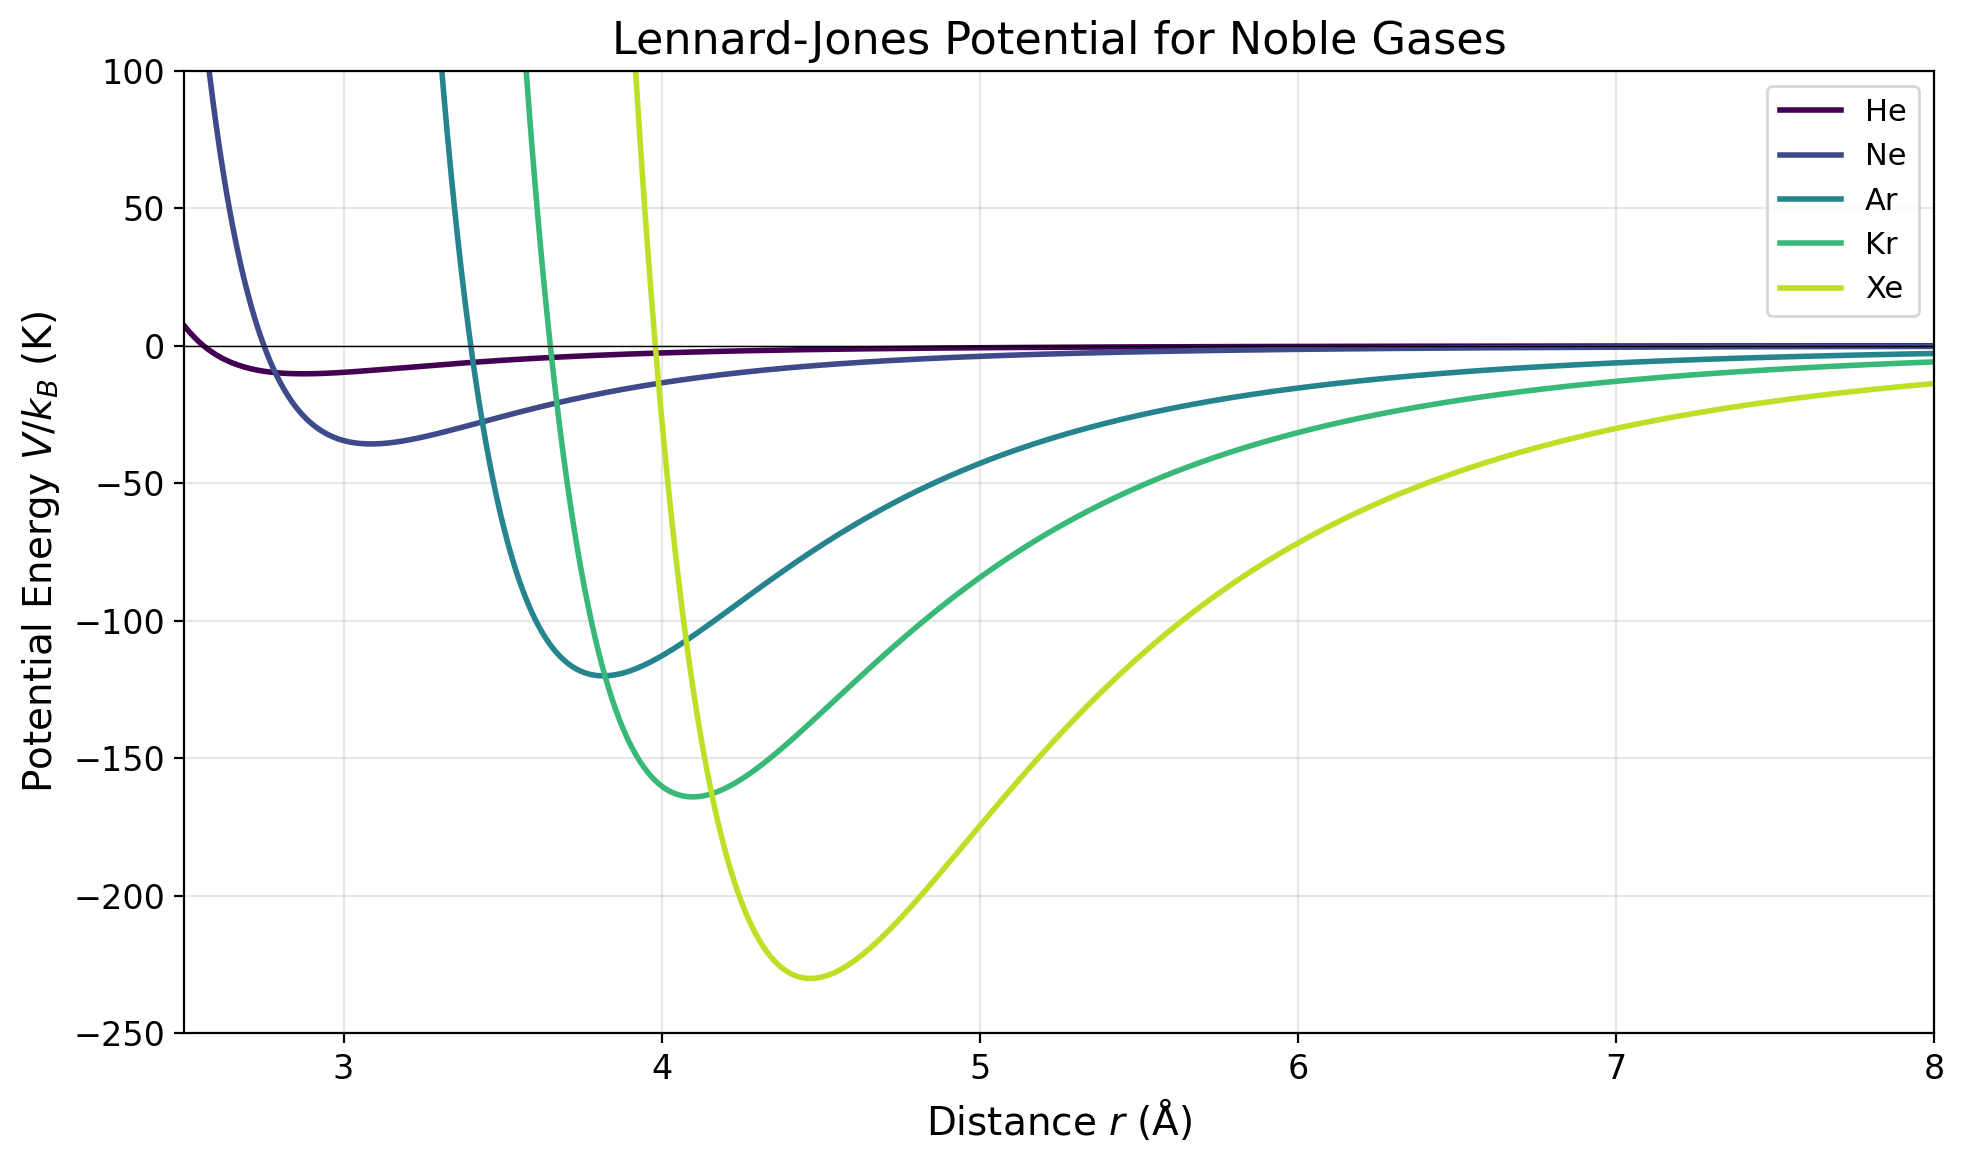

In [6]:
# Compare Lennard-Jones potentials for different noble gases
noble_gases = {
    'He': {'epsilon_kB': 10.2, 'sigma': 2.56},
    'Ne': {'epsilon_kB': 35.7, 'sigma': 2.75},
    'Ar': {'epsilon_kB': 120, 'sigma': 3.40},
    'Kr': {'epsilon_kB': 164, 'sigma': 3.65},
    'Xe': {'epsilon_kB': 230, 'sigma': 3.98}
}

fig, ax = plt.subplots(figsize=(10, 6))

r_angstrom = np.linspace(2.5, 8, 500)

colors = plt.cm.viridis(np.linspace(0, 0.9, len(noble_gases)))

for (gas, params), color in zip(noble_gases.items(), colors):
    epsilon = params['epsilon_kB']  # in Kelvin
    sigma = params['sigma']  # in Angstroms
    
    V = lennard_jones_potential(r_angstrom, epsilon, sigma)
    ax.plot(r_angstrom, V, '-', linewidth=2, color=color, label=f'{gas}')

ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax.set_xlabel('Distance $r$ (Å)', fontsize=14)
ax.set_ylabel('Potential Energy $V/k_B$ (K)', fontsize=14)
ax.set_title('Lennard-Jones Potential for Noble Gases', fontsize=16)
ax.set_xlim(2.5, 8)
ax.set_ylim(-250, 100)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

The Lennard-Jones potential provides a simple yet effective model for describing:

1. **Van der Waals interactions** in noble gases
2. **Non-bonded interactions** in molecular dynamics simulations
3. **Effective pair potentials** in soft matter physics

Key characteristics:
- Minimum at $r_m = 2^{1/6}\sigma \approx 1.122\sigma$
- Well depth $\varepsilon$ at the minimum
- Zero crossing at $r = \sigma$
- Strongly repulsive for $r < \sigma$
- Weakly attractive for $r > r_m$

While the $r^{-12}$ repulsive term is empirical, the potential remains one of the most successful and widely-used models in computational physics due to its simplicity and reasonable accuracy for many systems.